In [22]:
import pandas as pnd
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import inv
from numpy.polynomial import Polynomial


In [23]:
#a
ex_a_dataframe = pnd.read_csv('ex_a.csv')
ex_a = ex_a_dataframe.to_numpy()
ex_a_x = ex_a[:, 0]
ex_a_y = ex_a[:, 1]


In [24]:
ex_a_fit = Polynomial.fit(ex_a_x, ex_a_y, 6)
#A = ex_a_fit.coef
#A_t =A[np.newaxis]
#A_t = np.transpose(A_t)
#print(A_t)
print('fitting_polynomial is ', ex_a_fit)

fitting_polynomial is  0.14491445068359382 - 0.11821231717930536·x¹ + 0.22073622242838445·x² +
0.05093256733501067·x³ - 0.92876690315755·x⁴ + 0.05798566505408465·x⁵ +
0.6533617300455719·x⁶


Text(0.5, 0, 'y')

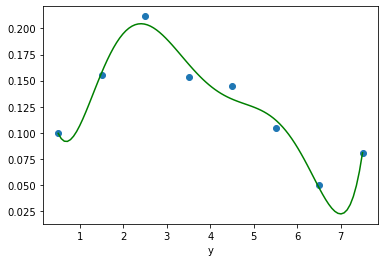

In [61]:
x_a_fit, y_a_fit = ex_a_fit.linspace()
plt.plot(x_a_fit, y_a_fit, 'g')
plt.scatter(ex_a_x, ex_a_y)
#print(x_a_fit)
#print(y_a_fit)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

In [26]:
#c
ex_c_dataframe = pnd.read_csv('ex_c.csv')
ex_c = ex_c_dataframe.to_numpy()
ex_c_x = ex_c[:, 0]
ex_c_y_all = (ex_c[:, 1:51])
ex_c_y = np.mean(ex_c_y_all, axis=1)
ex_y_std = np.std(ex_c_y_all, axis=1)
#print(ex_c_y)

#print(np.size(ex_c_x), np.size(ex_c_y))

In [27]:
#plt.scatter(ex_c_x, ex_c_y)

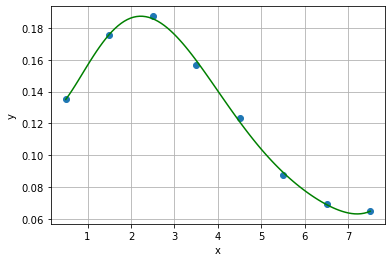

In [62]:
ex_c_fit = Polynomial.fit(ex_c_x, ex_c_y, 6)
x_c_fit, y_c_fit = ex_c_fit.linspace()
plt.plot(x_c_fit, y_c_fit, 'g')
plt.scatter(ex_c_x, ex_c_y)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

In [46]:
#b

def p1(x):
    return x
def p2(x):
    return x**2
def p3(x):
    return x**3
def p4(x):
    return x**4
def p5(x):
    return x**5
def p6(x):
    return x**6


funcs = [np.ones_like, p1, p2,p3, p4,p5, p6]
def jacobi_matrix(funcs, x):
    '''Create the design matrix for a linear least squares problem'''
    return np.column_stack([f(x) for f in funcs])




C = np.eye(8, k=1) - 2*np.eye(8) + np.eye(8, k=-1)
C[0,0] = -1
C[6,6] = -1
lambd = [.1,0.3,0.7,3,10]

A = jacobi_matrix(funcs, ex_a_x)
#print("Jacobi Matrix",A)
#A[:5]
#print(ex_a_x)
A_t = np.transpose(A)
#print(A)
#print(A.shape)
#print(C.shape)
CA = np.matmul(C, A)
CA_t = np.transpose(CA)
polynomials = np.zeros(7)
a_reg = np.zeros(shape=(5,7))
for i in range(0,len(lambd)):
    CA_2 = lambd[i]*np.matmul(CA_t, CA)
    AA = np.matmul(A_t,A)
    A_temp = np.linalg.inv(AA + CA_2)
    #print(A_temp)
    #a_reg = np.flipud(A_temp*A_t)
    #print(a_reg)
    #a_reg = np.squeeze(a_reg)
    #for i in range(0, 6):
    #    a_reg[i] = a_reg[i]*ex_a_fit.coef[i]
    #polynom = Polynomial(a_reg)
    #print(polynom)
    a_reg[i,:] = np.matmul(np.matmul(A_temp,A_t),ex_a_y)
    #print(a_reg)


#print(polynom)

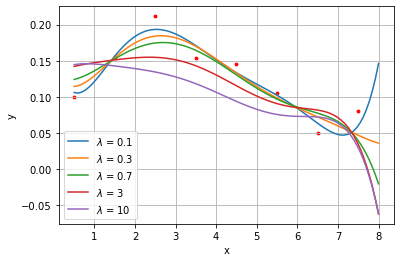

In [59]:
s = r"$\lambda \, = $"
for i in range(0,len(lambd)):
    polynom = Polynomial(a_reg[i,:])
    x_a_reg, y_a_reg = polynom.linspace(n=100,domain=[0.5,8])
    #print(x_a_reg)
    #print(y_a_reg)
    
    d = str(lambd[i])
    plt.plot(x_a_reg, y_a_reg,label=s+d)

plt.legend()
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(ex_a_x, ex_a_y,s=8,c='r')